## Carregando os Dados

In [44]:
import pandas as pd

dataset = pd.read_csv("https://raw.githubusercontent.com/ect-info/ml/master/dados/diabetes.csv")
dataset.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [45]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
dataset.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## Escolhendo atributos 
* Idade e IMC


In [47]:
X = dataset.loc[:,['Age','BMI']].values
# ou 
# X = dataset.iloc[:,2:4].values

y = dataset['Outcome'].values

print(X[0:8,:])

[[50.  33.6]
 [31.  26.6]
 [32.  23.3]
 [21.  28.1]
 [33.  43.1]
 [30.  25.6]
 [26.  31. ]
 [29.  35.3]]


## Separando entre conjuntos de treinamento e teste

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## Normalização 
* A amplitude de variação dos dados nos atributos idade e salário são bem diferentes
* Permite que a faixa de variação seja equilibrada entre os diferentes atributos 
* Muitos algoritmos de aprendizado de máquinas são sensíveis a atribuitos com aplitude de valores muito distintos 
* Vídeo com explicações: https://youtu.be/kIeXOC-Rnb4 

In [49]:
# Fonte: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

## Treinamento

In [50]:
import tensorflow as tf

### Construíndo a estrutra da rede 
* Arquitetura 

In [51]:
# Inicialização 
classifier = tf.keras.models.Sequential()

# Adicionando a camada de entrada e a primeira camada escondida  
classifier.add( tf.keras.layers.Dense( activation = 'relu', input_dim = 2, units = 4, kernel_initializer = 'uniform'))

# Adicionando a camada de saída 
classifier.add( tf.keras.layers.Dense( activation = 'sigmoid', units = 1, kernel_initializer = 'uniform'))

In [52]:
# Montando a Rede 
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Executando o treinamento 

In [53]:
classifier.fit(X_train, y_train, batch_size = 1, epochs = 81)

Epoch 1/81
576/576 [==============================] - 2s 2ms/step - loss: 0.6817 - accuracy: 0.6424
Epoch 2/81
576/576 [==============================] - 1s 2ms/step - loss: 0.6641 - accuracy: 0.6424
Epoch 3/81
576/576 [==============================] - 2s 3ms/step - loss: 0.6564 - accuracy: 0.6424
Epoch 4/81
576/576 [==============================] - 1s 2ms/step - loss: 0.6534 - accuracy: 0.6424
Epoch 5/81
576/576 [==============================] - 1s 2ms/step - loss: 0.6518 - accuracy: 0.6424
Epoch 6/81
576/576 [==============================] - 1s 2ms/step - loss: 0.6501 - accuracy: 0.6424
Epoch 7/81
576/576 [==============================] - 1s 2ms/step - loss: 0.6486 - accuracy: 0.6424
Epoch 8/81
576/576 [==============================] - 1s 2ms/step - loss: 0.6469 - accuracy: 0.6424
Epoch 9/81
576/576 [==============================] - 1s 2ms/step - loss: 0.6449 - accuracy: 0.6424
Epoch 10/81
576/576 [==============================] - 1s 2ms/step - loss: 0.6426 - accuracy: 0.6424

## Avaliando do Modelo

In [73]:
y_pred = classifier.predict(X_test)

print(y_test[0:50])
print(y_pred[0:50])

6/6 [==============================] - 0s 8ms/step
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1]
[[0.25732946]
 [0.16957091]
 [0.21458404]
 [0.5544835 ]
 [0.23568688]
 [0.124098  ]
 [0.4421961 ]
 [0.5544835 ]
 [0.14871486]
 [0.5544835 ]
 [0.2546948 ]
 [0.5544835 ]
 [0.5544835 ]
 [0.15604843]
 [0.5544835 ]
 [0.29871348]
 [0.5138506 ]
 [0.0688894 ]
 [0.5544835 ]
 [0.34511122]
 [0.5544835 ]
 [0.23303042]
 [0.15982448]
 [0.5544835 ]
 [0.07883397]
 [0.15508404]
 [0.10507083]
 [0.5544835 ]
 [0.11227026]
 [0.22997059]
 [0.5544835 ]
 [0.20512865]
 [0.20288244]
 [0.32143226]
 [0.09454025]
 [0.5544835 ]
 [0.5544835 ]
 [0.07960623]
 [0.23307388]
 [0.23755533]
 [0.1829644 ]
 [0.23050271]
 [0.29279965]
 [0.22554748]
 [0.5544835 ]
 [0.01425168]
 [0.07960623]
 [0.1911046 ]
 [0.2479936 ]
 [0.2395003 ]]


In [74]:
y_pred_bin = [ ( 1 if elem > 0.5 else 0) for elem in y_pred ] 

In [75]:
import numpy as np

y_pred_bin =  np.array(y_pred_bin)

In [76]:
print(y_test[0:50])
print(y_pred_bin[0:50])

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 1 1 0 0 1 1 1]
[0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 0]


In [77]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

Acurácia:  66.14583333333334 %


In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_bin)
print("Matrix de confusão: ")
print(cm)


Matrix de confusão: 
[[98 32]
 [33 29]]


## Visualizando os resultados



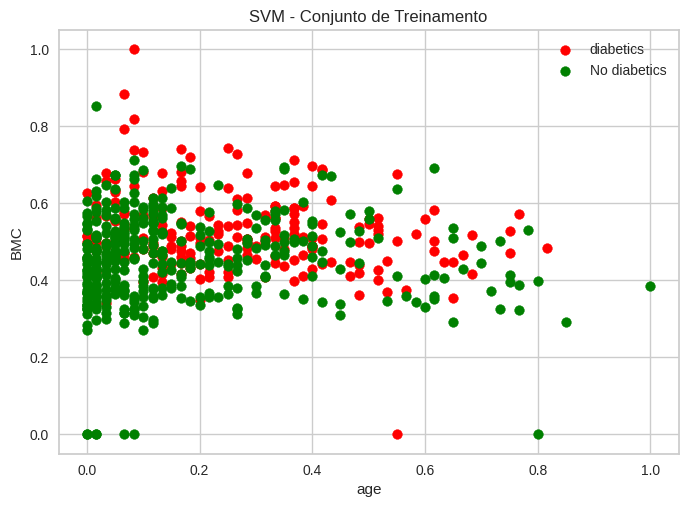

In [79]:
import matplotlib.pyplot as plt

# Seleção dos elementos classificados como negativos (não compra)
age_neg = X_train[y_train == 0, 0]
salary_neg = X_train[y_train == 0, 1]
age_pos = X_train[y_train == 1, 0]
salary_pos = X_train[y_train == 1, 1]

plt.scatter(age_pos,salary_pos, color='red', label = 'diabetics')
plt.scatter(age_neg,salary_neg, color='green', label = 'No diabetics')

plt.title('SVM - Conjunto de Treinamento')
plt.xlabel('age')
plt.ylabel('BMC')
plt.legend()
plt.show()

76/76 [==============================] - 0s 1ms/step


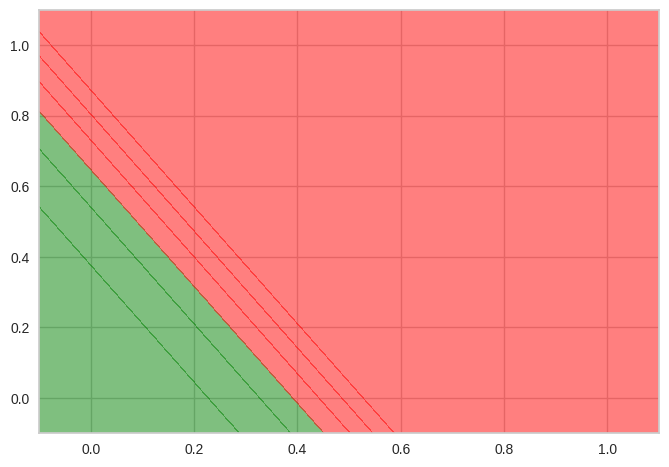

In [80]:
vx = np.arange(-0.1, 1.1, 0.025) 
vy = np.arange(-0.1, 1.1, 0.025)
X1, X2 = np.meshgrid(vx,vy) 

y_pred_mesh =  classifier.predict(np.array([X1.ravel(),X2.ravel()]).T ).reshape(X1.shape)

from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, y_pred_mesh, alpha  = 0.5, cmap = ListedColormap(('green','red')))

In [71]:
from sklearn.metrics import accuracy_score

print("Acurácia: ", accuracy_score(y_test,y_pred_bin)*100, "%"  )

Acurácia:  66.14583333333334 %
